## Overview

#### This is a project from DataInMotion, a community for skill & career development data. The data was provided, to be analysed and give insightful solution to the folowing problem statements. The dataset contains 550 observations (rows) and 7 variables (columns)

1. Is there any missing data?
2. Are there any duplicates?
3. Are there any spelling errors in the Name column?
4. Create a plot showing the top 10 authors by rating.
5. Create a pie chart showing the distribution of book genre.
6. Create a plot showing the top 5 books by number of reviews.
7. Are there any outliers?
##### <span style='color: red;'>BONUS:</span>
8. What is the average price of Books are sold each year categorized by their Genres?
19. What is the average review of books per year categorized by their Genres?
10. What is the correlation between the numerical columns?

In [51]:
#import the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

### Data Inspection and Cleaning

In [52]:
#load the dataset
df = pd.read_csv('bestsellers.csv')

In [53]:
#checp for any samples from the dataset
df.sample(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
23,American Sniper: The Autobiography of the Most...,Chris Kyle,4.6,15921,9,2015,Non Fiction
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
363,"The Dukan Diet: 2 Steps to Lose the Weight, 2 ...",Pierre Dukan,4.1,2023,15,2011,Non Fiction
301,Steve Jobs,Walter Isaacson,4.6,7827,20,2011,Non Fiction


In [54]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [55]:
#rename the columns names
df.rename(columns={'Name':'name', 
                   'Author': 'author', 
                   'User Rating': 'user_rating',
                   'Reviews': 'review',
                   'Price':'price', 
                   'Year':'year', 
                   'Genre':'genre'}, inplace=True)

In [56]:
df.head()

,name,author,user_rating,review,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [57]:
#check for the number of unique observations
df.nunique()

name           351
author         248
user_rating     14
review         346
price           40
year            11
genre            2
dtype: int64

In [58]:
#check the sahpe of the dataset
df.shape

(550, 7)

#### Question 1: Is there any missing data? 

In [59]:
#check for the null values in the dataset
df.isna().sum()

name           0
author         0
user_rating    0
review         0
price          0
year           0
genre          0
dtype: int64

##### <span style='color: blue;'>Answer: No, there is no missing data in the dataset</span>

#### Question 2: Are there any duplicates?

In [60]:
#check for any duplicates
df.duplicated().sum()

0

##### <span style='color: blue;'>Answer: There is no duplicate data </span>

#### Question 3: Are there any spelling errors in the Name column?

In [61]:
df['name'].value_counts().head(10)

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Very Hungry Caterpillar                                                           7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
Unbroken: A World War II Story of Survival, Resilience, and Redemption                5
First 100 Words                                                                       5
The Five Dysfunctions of a Team: A Leadership Fable                                   5
Name: name, dtype: int64

##### <span style='color: blue;'>Answer: There is no spelling error in the Name column, The titles contain much details about the book. Too long though. My sugestion is that, it should be splitted into two columns (title and description)</span>

#### Question 4: Create a plot showing the top 10 authors by rating.

In [62]:
#group the dataset by author with mean values of the numerical columns
author = df.groupby(['author']).mean()

#sort descendingly by user rating
author = author.sort_values('user_rating', ascending=False)

#fetch top 10 authors with top ratings
top_author = author.head(10)

top_author[['user_rating']]

,user_rating
author,
Jill Twiss,4.9
Nathan W. Pyle,4.9
Chip Gaines,4.9
Rush Limbaugh,4.9
Bill Martin Jr.,4.9
Emily Winfield Martin,4.9
Pete Souza,4.9
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9


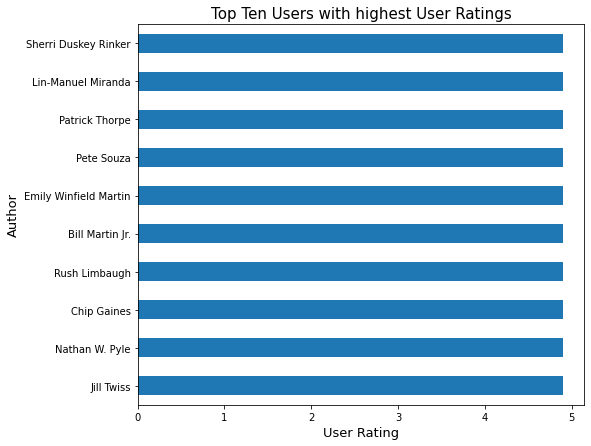

In [63]:
#set canvas size
plt.figure(figsize=(8,7))

#create a barh chart and customization
top_author['user_rating'].plot(kind='barh')
plt.title('Top Ten Users with highest User Ratings', {'fontsize': 15})
plt.xlabel('User Rating', {'fontsize': 13})
plt.ylabel('Author', {'fontsize': 13});

#### Question 5: Create a pie chart showing the distribution of book genre.

In [64]:
#print the number of books from each category
df['genre'].value_counts()

Non Fiction    310
Fiction        240
Name: genre, dtype: int64

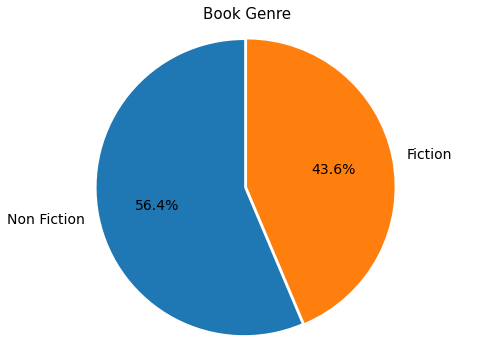

In [65]:
#set canvas size for the chart
plt.figure(figsize=(8,6))

#create a pie chart and customization
plt.pie(x=df['genre'].value_counts(), startangle=90, 
        labels= df['genre'].value_counts().index, 
       autopct = '%1.1f%%', textprops={'fontsize': 14},
       explode=[0.02,0])
plt.title('Book Genre', {'fontsize': 15})
plt.axis('equal');

##### <span style='color: blue;'>Answer: 310 books belong to non fiction genre constituting to 56.4% of the total dataset while 240 books belongs to the Fiction genre making just 43.6% of the entire dataset. Therefore, there are more books in the Non fiction genre than in the Fiction genre </span>

#### Question 6: Create a plot showing the top 5 books by number of reviews

In [66]:
#group the dataset by name with sum values of the numerical columns
top_book = df.groupby(['name']).sum()

#sort descendingly by reviews
top_book = top_book.sort_values('review', ascending=False)

#fetch top 5 authors with top ratings
top_book = top_book.head(5)

top_book[['review']]

,review
name,
The Fault in Our Stars,201928
"Oh, the Places You'll Go!",174672
Gone Girl,171813
The Girl on the Train,158892
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",148365


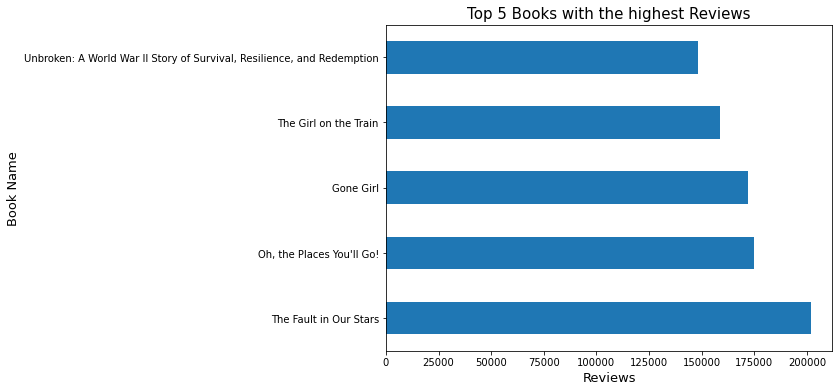

In [67]:
#set canvas size
plt.figure(figsize=(8,6))

#create a barh chart and customization
top_book['review'].plot(kind='barh')
plt.title('Top 5 Books with the highest Reviews', {'fontsize': 15})
plt.xlabel('Reviews', {'fontsize': 13})
plt.ylabel('Book Name', {'fontsize': 13});

##### <span style='color: blue;'>Answer: The book titled 'The Fault in Our Stars' has the highest review with 201,928 total reviews followed by 'Oh, the Places You'll Go!' (174,672 reviews), 'Gone Girl' (171,813 reviews), 'The Girl on the Train' (158,892 reviews) and least on the list is 'Unbroken' (148365 reviews) </span>

#### Question 7: Are there any outliers? 

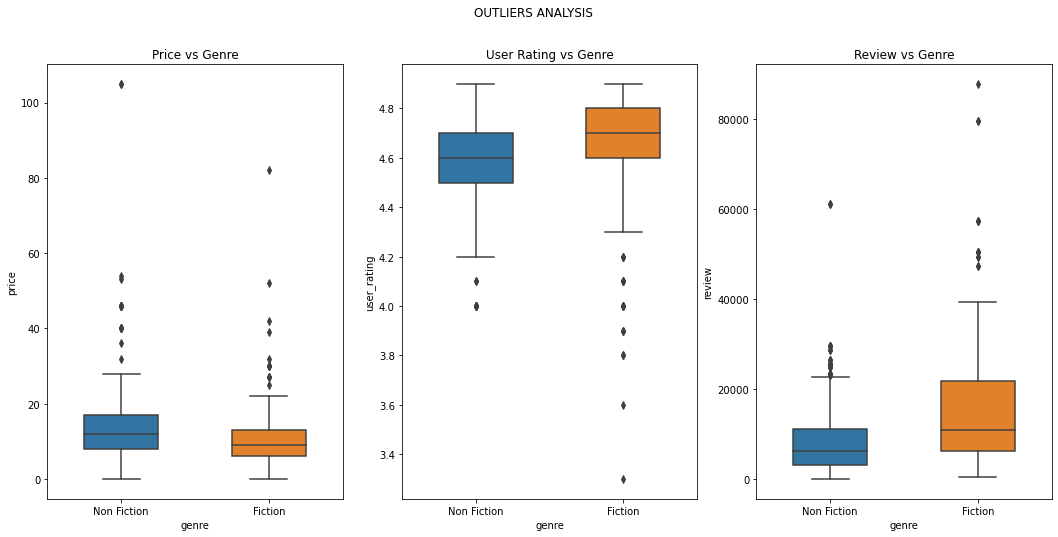

In [68]:
#set canvas size and number of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharex=True)

#set a general title for the three charts
fig.suptitle('OUTLIERS ANALYSIS')

#create the first plot and title
sns.boxplot(ax=axes[0], data=df, x='genre', y='price', width=0.5)
axes[0].set_title('Price vs Genre')

#create the second plot and title
sns.boxplot(ax=axes[1], data=df, x='genre', y='user_rating', width=0.5)
axes[1].set_title('User Rating vs Genre')

#create the third plot and title
sns.boxplot(ax=axes[2], data=df, x='genre', y='review', width=0.5)
axes[2].set_title('Review vs Genre');

##### <span style='color: blue;'>Answer: Its very Obvious that there are outliers in the dataset. The above chart shows the distributions of price, user rating and reviews based on the Book Genre using a box plot. The average Price of the books below 20, average user rating is around 4.6 and average revie is below 10,000. Any huge spike below or above these averages can be conisdered outliers.</span>

#### Question 8: What is the average price of Books sold each year categorized by their Genres?



In [107]:
#group the dataset by year and genre with mean estimation
avg_yr_price = df.groupby(['year','genre']).mean()
avg_yr_price[['price']]

price
year genre                 
2009 Fiction      15.583333
     Non Fiction  15.230769
2010 Fiction       9.700000
     Non Fiction  16.000000
2011 Fiction      11.619048
     Non Fiction  17.620690
2012 Fiction      12.285714
     Non Fiction  17.482759
2013 Fiction      10.708333
     Non Fiction  18.192308
2014 Fiction      10.172414
     Non Fiction  20.809524
2015 Fiction       9.352941
     Non Fiction  10.969697
2016 Fiction      12.631579
     Non Fiction  13.516129
2017 Fiction       8.833333
     Non Fiction  13.730769
2018 Fiction       8.761905
     Non Fiction  11.793103
2019 Fiction       9.350000
     Non Fiction  10.566667

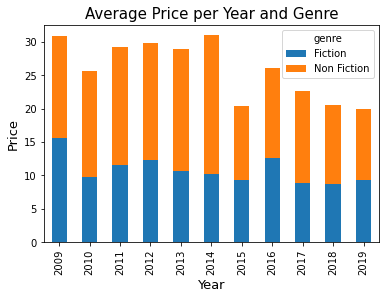

In [114]:
#create a stacked barplot and customuize
avg_yr_price.unstack().plot(kind='bar',y='price', stacked=True)
plt.title('Average Price per Year and Genre', {'fontsize': 15})
plt.xlabel('Year', {'fontsize': 13})
plt.ylabel('Price', {'fontsize': 13});

##### <span style='color: blue;'>Answer: The average prices spent on books drops by year especially for the Fictional booka</span>

#### 9. What is the average review of books per year categorized by their Genres?

In [121]:
review_metrics = df.groupby(['year', 'genre']).mean()
review_metrics = review_metrics[['review']]
review_metrics

review
year genre                    
2009 Fiction       6534.333333
     Non Fiction   3026.230769
2010 Fiction       8409.250000
     Non Fiction   3526.533333
2011 Fiction      10335.285714
     Non Fiction   6482.758621
2012 Fiction      19896.238095
     Non Fiction   8162.931034
2013 Fiction      19986.833333
     Non Fiction   6739.346154
2014 Fiction      19382.862069
     Non Fiction  10994.952381
2015 Fiction      23706.117647
     Non Fiction   9353.484848
2016 Fiction      19563.263158
     Non Fiction  10906.387097
2017 Fiction      14611.833333
     Non Fiction  11297.538462
2018 Fiction      12710.428571
     Non Fiction  14813.862069
2019 Fiction      18507.150000
     Non Fiction  14159.133333

<Figure size 720x432 with 0 Axes>

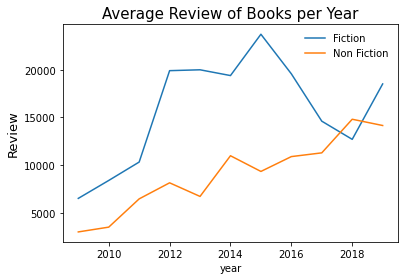

In [139]:
#set canvas size
plt.figure(figsize=(10,6))

review_metrics.unstack().plot()
plt.title('Average Review of Books per Year', {'fontsize': 15})
plt.ylabel('Review', {'fontsize': 13})
plt.legend(['Fiction', 'Non Fiction'], loc='upper right', frameon=False);

##### <span style='color: blue;'>Answer: The plot above shows the trend of the average reviews made each year. The non fictional books get increasing reviews by year until 2015 when there was a fall and picked up in 2018. For non fictional books, there has been an increasing trend on the average reviews made by year. </span>

#### 10. What is the correlation between the numerical columns?

In [137]:
#create a sub_dataset corr containing the columns
cor = df[['user_rating', 'review', 'price']]

#create correlation table corr
cor_table = cor.corr()

#print cor_table
cor_table

,user_rating,review,price
user_rating,1.000000,-0.001729,-0.133086
review,-0.001729,1.000000,-0.109182
price,-0.133086,-0.109182,1.000000


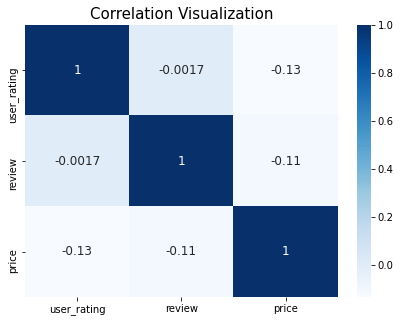

In [154]:
#visualizing the correlation using seaborn Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cor_table, cmap='Blues', annot=True, annot_kws = { 'fontsize' : 12 })
plt.title('Correlation Visualization', {'fontsize': 15} );

##### <span style='color: blue;'>Answer: The visualization above shows the relationship between the numerical columns i.e. (user_rating, reviews, price). It can be deduced that the three columns are negatively correlated to one another. </span>

### Thanks!!!